In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn
import scipy


sns.set()

In [54]:
data = pd.read_csv('kaggle_diabetes-Copy1.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [55]:
data.shape

(2000, 9)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


# EDA

In [57]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


# Histogram Plot

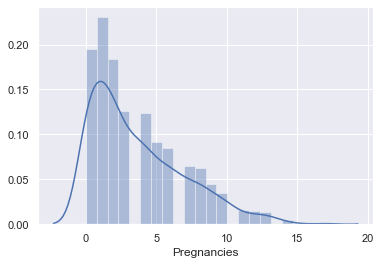

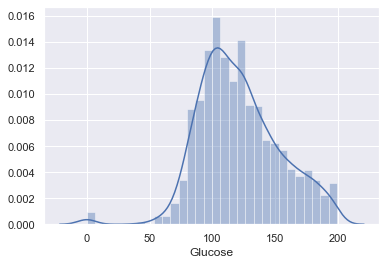

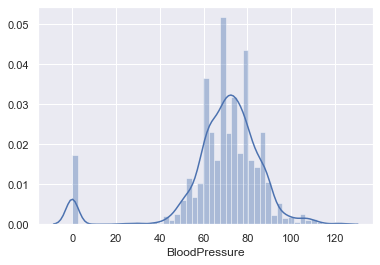

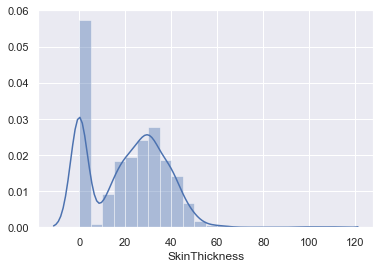

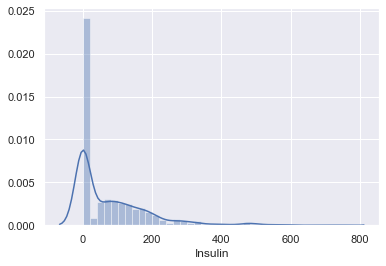

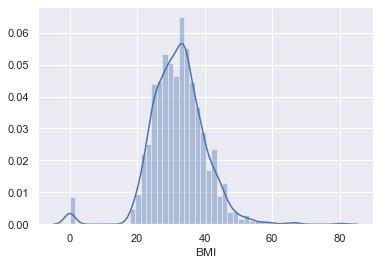

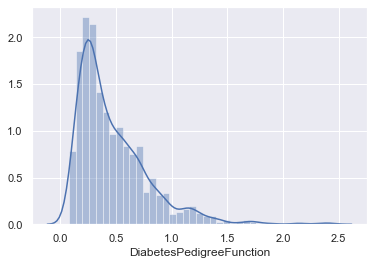

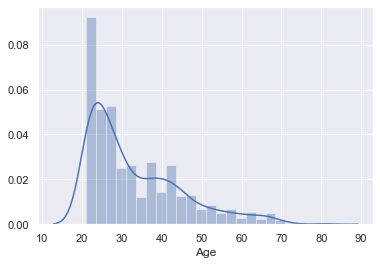

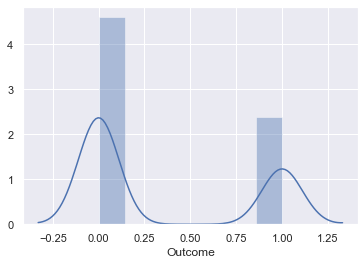

In [58]:
data_fetures = data.columns
for feature in data_fetures:
    p = sns.distplot(a = data[feature])
    plt.show()

**Removal of Zeros**\
\
Since there are many zeros in data and values of 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' cannot be zero,
Therefore, Converriting Zeros into NaN value

In [59]:
data_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [60]:
data[data_zeros] = np.where((data[data_zeros] == 0), np.nan, data[data_zeros])

In [61]:
data.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

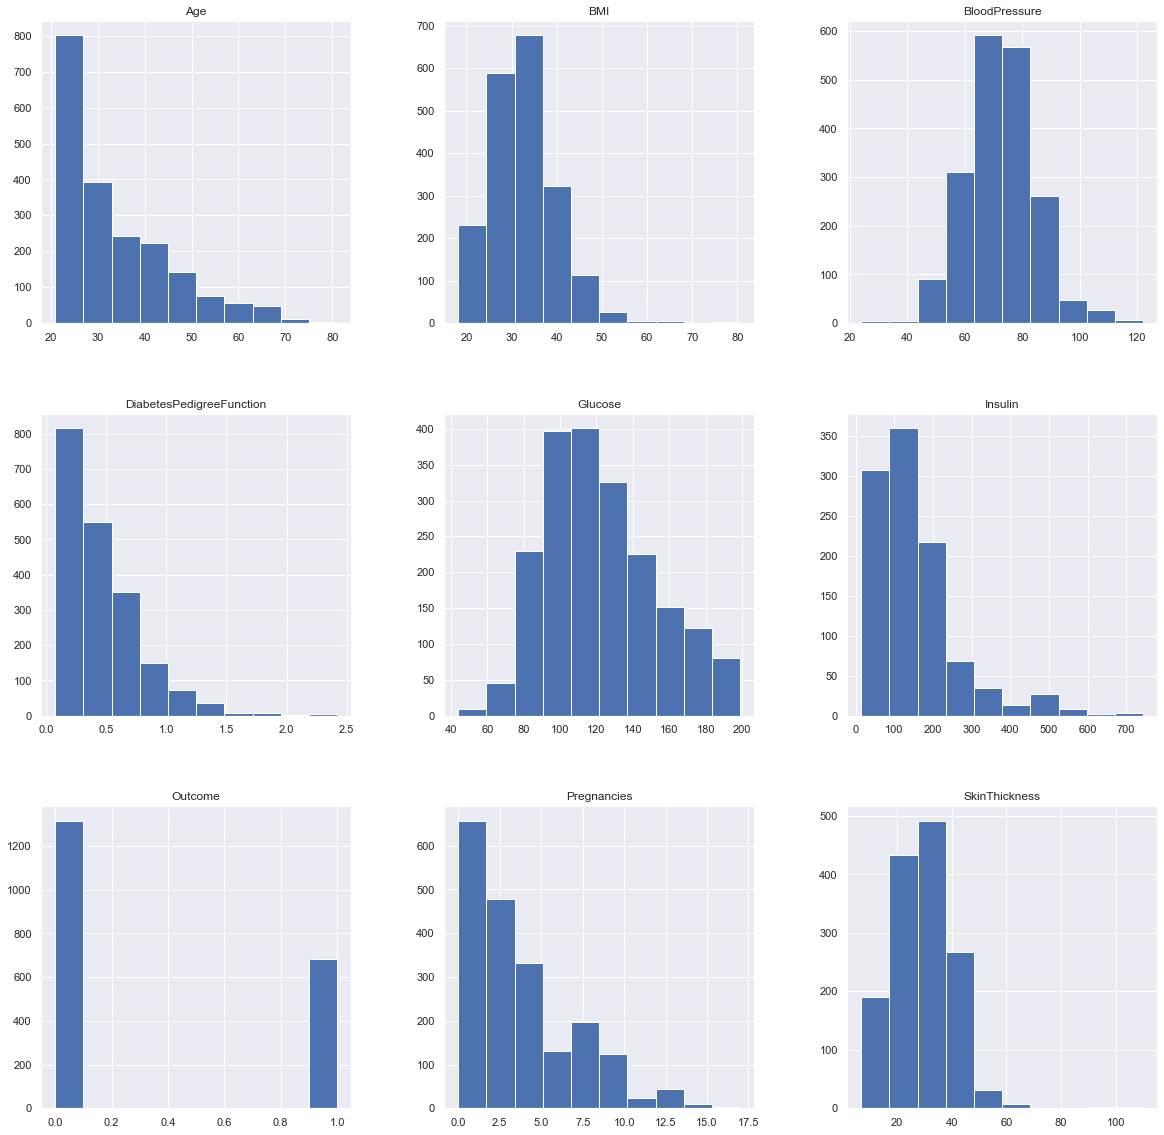

In [62]:
# for feature in data_feature:
#     plt.hist(data[feature])
#     plt.show()
p = data.hist(figsize = (20,20))

**Handling Missing Values**\
\
Filling NaN values with suitable mean and median values

In [63]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.703500,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,1987.0,121.975340,30.632883,44.000,99.000,117.000,141.000,199.00
BloodPressure,1910.0,72.403665,12.227968,24.000,64.000,72.000,80.000,122.00
SkinThickness,1427.0,29.341275,10.802278,7.000,22.000,29.000,36.000,110.00
Insulin,1044.0,153.743295,111.273639,14.000,76.750,126.000,190.000,744.00
BMI,1972.0,32.650101,7.241027,18.200,27.500,32.400,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.470930,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.090500,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.342000,0.474498,0.000,0.000,0.000,1.000,1.00


In [64]:
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].mean())
#data.isnull().sum()

In [65]:
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].mean())
# data.isnull().sum()

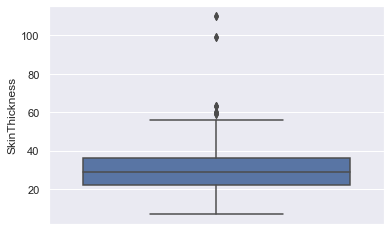

In [66]:
sns.boxplot(y = 'SkinThickness', data = data)

In [67]:
data['SkinThickness'].mean(), data['SkinThickness'].median() 

(29.34127540294324, 29.0)

In [68]:
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())
# data.isnull().sum()

In [69]:
data['Insulin'].mean(), data['Insulin'].median() 

(153.74329501915707, 126.0)

In [70]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())
# data.isnull().sum()

In [71]:
data['BMI'].mean(), data['BMI'].median() 

(32.650101419878276, 32.4)

In [72]:
data['BMI'] = data['BMI'].fillna(data['BMI'].median())
# data.isnull().sum()

In [73]:
for i in range(9):
    print(data.columns[i])

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


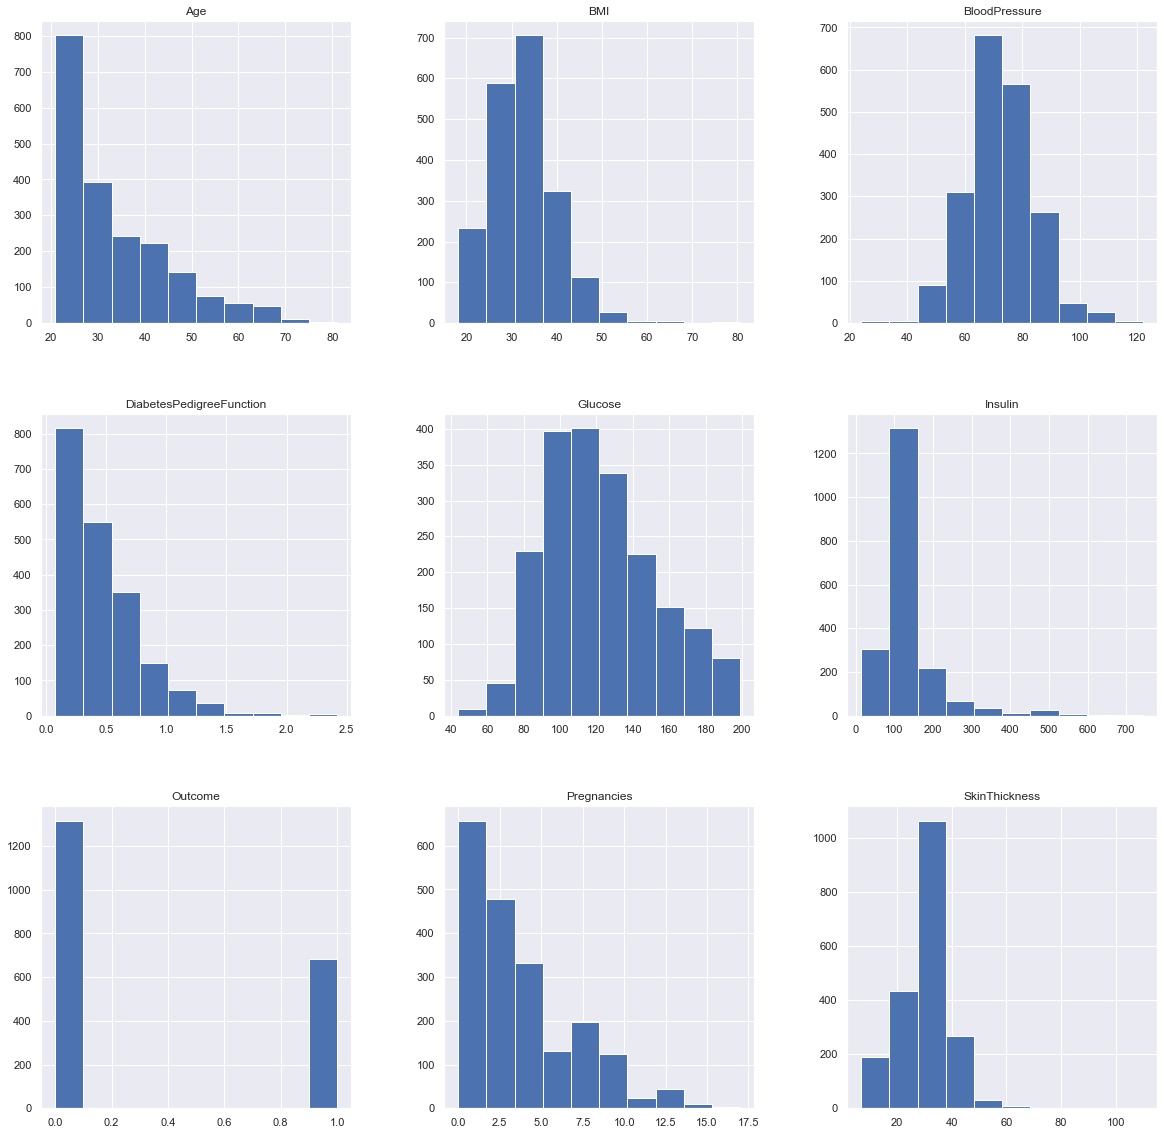

In [74]:
# for feature in data.columns:
#     plt.hist(data[feature])
#     plt.title(feature)
#     plt.show()
p = data.hist(figsize = (20,20))

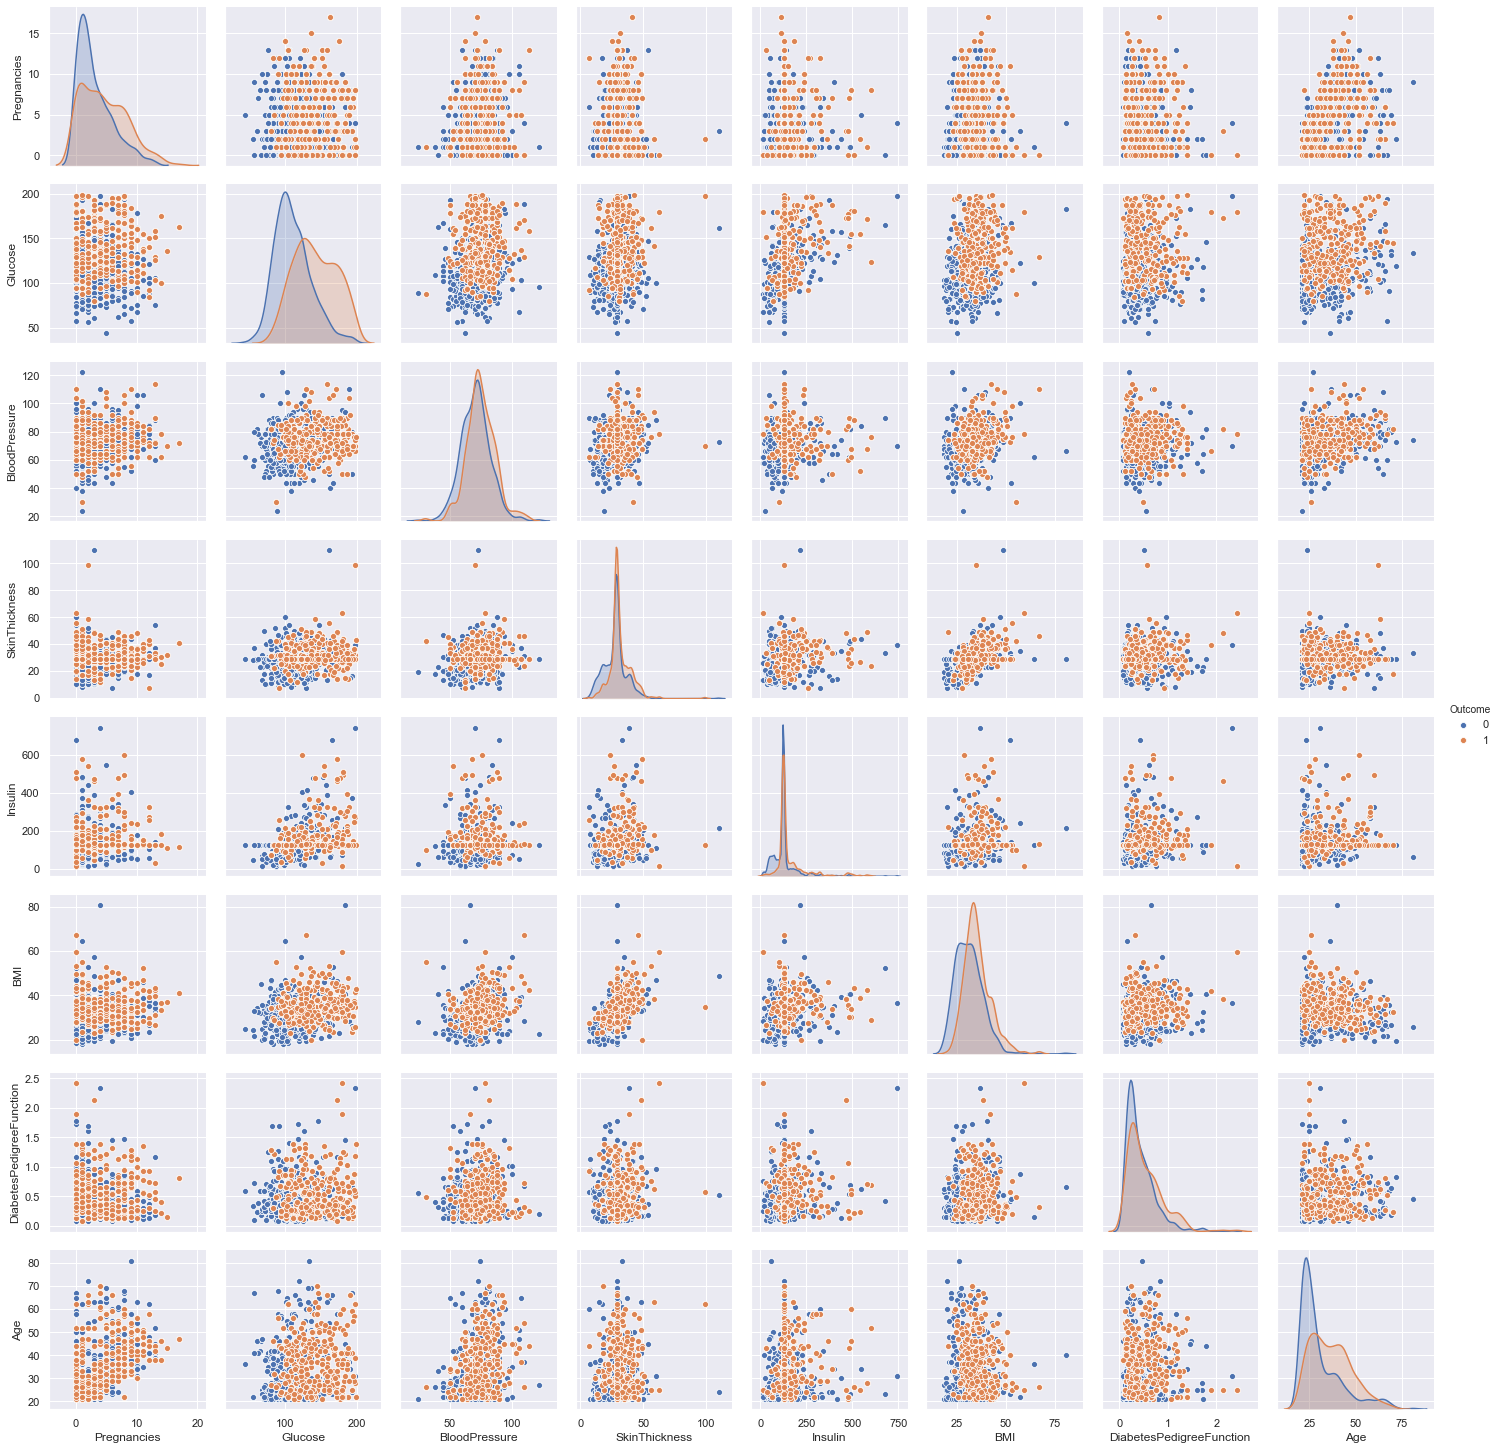

In [75]:
sns.pairplot(data =data, hue = 'Outcome')
plt.show()

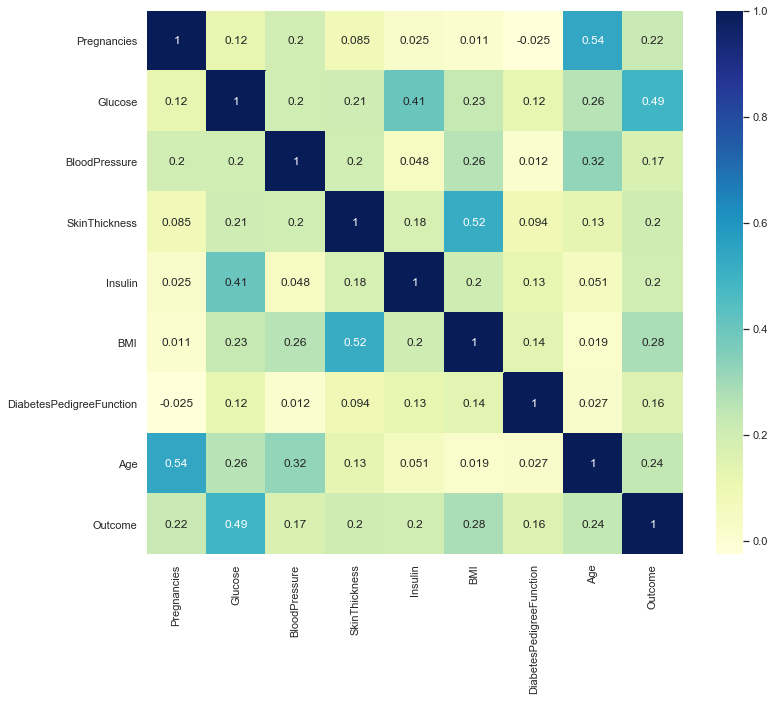

In [76]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

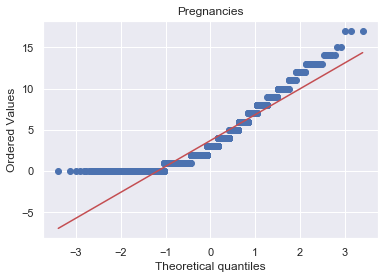

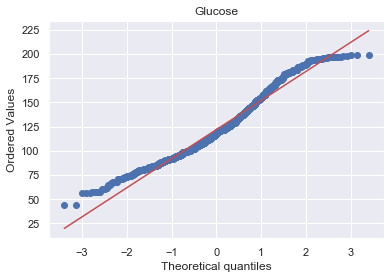

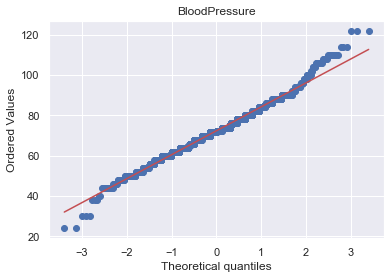

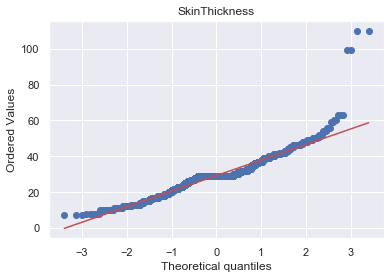

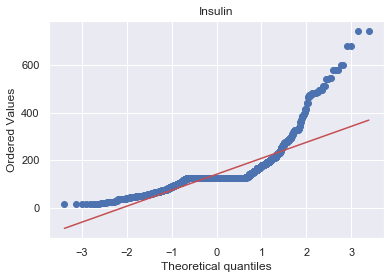

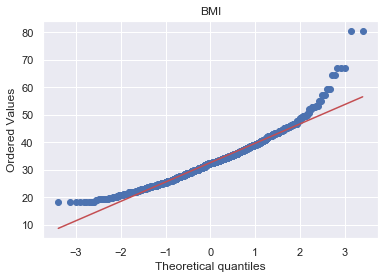

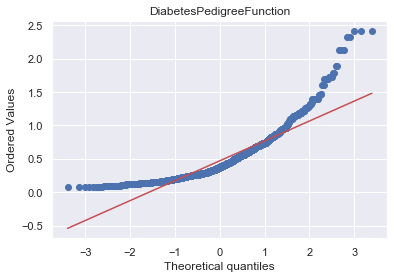

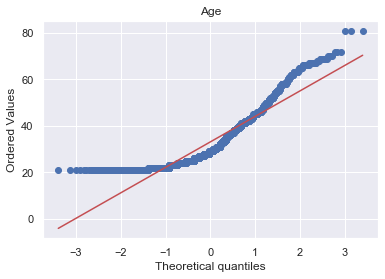

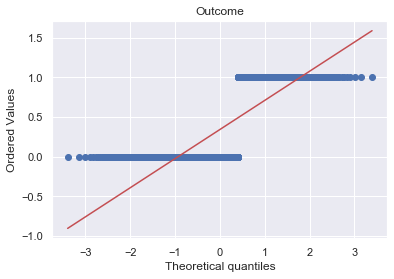

In [77]:
from scipy import stats
for feature in data.columns:
    stats.probplot(data[feature], plot = plt)
    plt.title(feature)
    plt.show()

## Standardizing Data

In [78]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [79]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47,1
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31,1
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21,0


In [80]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [81]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21


In [82]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

In [83]:
#X[:] = scale.fit_transform(X[:])

In [84]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21


---

## Splitting data into train and test set

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

---

## Fitting data in various models

In [86]:
def svm_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [87]:

def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [88]:

def naive_classifier(X_train, X_test, y_train, y_test):
    
    classifier_naive = GaussianNB()
    classifier_naive.fit(X_train, y_train)

    y_pred = classifier_naive.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_naive.score(X_train, y_train)}\nTest score : {classifier_naive.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [89]:
def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [90]:

def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [91]:
def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Naive:\n")
    naive_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)


In [92]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train score : 0.7725
Test score : 0.7675
----------------------------------------------------------------------------------------------------

KNN:

Train score : 0.8925
Test score : 0.8025
----------------------------------------------------------------------------------------------------

Naive:

Train score : 0.7525
Test score : 0.765
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 1.0
Test score : 0.9825
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 0.995


## Performance Metrics

In [93]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[272,   0],
       [  2, 126]], dtype=int64)

In [94]:
# classifier_svm = SVC(kernel = 'rbf', random_state = 0, probability=True)
# classifier_svm.fit(X_train, y_train)
# y_pred = classifier_svm.predict(X_test)

# cm = confusion_matrix(y_test, y_pred)
# cm

In [95]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,272,0,272
1,2,126,128
All,274,126,400


**Checking data is balanced or not**

In [96]:
data['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

**Classification Report (Accuracy, Precision, Recall, F1-score)**

In [97]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       272
           1       1.00      0.98      0.99       128

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



In [99]:
y_pred_prob = classifier_forest.predict_proba(X_test)[:,1]
y_pred_prob

array([0.01, 0.01, 0.99, 0.68, 0.92, 0.03, 0.01, 0.03, 0.36, 0.  , 0.07,
       0.99, 0.05, 0.07, 0.03, 0.  , 0.06, 0.08, 0.95, 0.99, 0.86, 0.91,
       0.03, 0.05, 0.03, 0.77, 0.02, 0.95, 0.03, 0.96, 0.89, 0.75, 0.  ,
       0.97, 0.  , 0.98, 0.29, 0.  , 0.01, 0.29, 0.  , 0.03, 0.91, 0.02,
       0.82, 0.37, 0.21, 0.04, 0.99, 0.88, 0.01, 0.  , 0.03, 0.94, 0.06,
       0.02, 0.07, 0.09, 0.06, 0.  , 0.01, 0.06, 0.06, 0.19, 0.  , 0.08,
       0.59, 0.07, 0.96, 0.01, 0.62, 0.04, 0.02, 0.  , 0.06, 0.97, 0.07,
       0.06, 0.08, 0.  , 0.03, 0.07, 0.03, 0.97, 0.  , 0.06, 0.11, 0.34,
       0.07, 0.76, 0.97, 0.19, 0.06, 0.67, 0.97, 0.  , 0.  , 0.06, 0.93,
       0.82, 0.  , 0.97, 0.29, 0.07, 0.65, 0.02, 0.  , 0.11, 0.02, 0.98,
       0.93, 0.94, 0.03, 0.  , 0.01, 0.75, 0.02, 0.03, 0.96, 0.01, 0.9 ,
       0.  , 0.  , 0.01, 0.03, 0.04, 0.01, 0.54, 0.01, 0.01, 0.01, 0.03,
       0.  , 0.94, 0.02, 0.02, 0.07, 0.12, 0.02, 0.  , 0.03, 0.12, 0.73,
       0.03, 0.32, 0.03, 0.99, 0.02, 0.99, 0.  , 0.

In [100]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
print("FPR:\n\n", fpr)


print("-"*100)

print("TPR:\n\n", tpr)

FPR:

 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00367647
 0.00367647 0.01102941 0.02573529 0.03676471 0.07352941 0.08088235
 0.09558824 0.10661765 0.12132353 0.125      0.13970588 0.14705882
 0.15808824 0.17279412 0.20220588 0.22426471 0.24264706 0.3125
 0.39705882 0.44117647 0.49264706 0.61397059 0.6875     0.8125
 1.        ]
----------------------------------------------------------------------------------------------------
TPR:

 [0.        0.0234375 0.1328125 0.234375  0.296875  0.3203125 0.3671875
 0.4453125 0.5       0.59375   0.6015625 0.6328125 0.6875    0.734375
 0.78125   0.8046875 0.8359375 0.8515625 0.859375  0.890625  0.8984375
 0.953125  0.984375  0.984375  1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.     

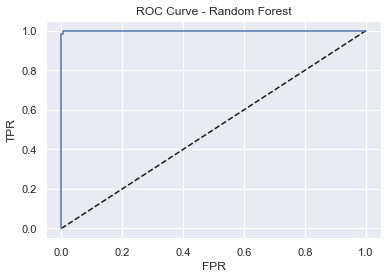

In [101]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest")
plt.show()

In [102]:
roc_auc_score(y_test,y_pred_prob)

0.9999425551470589

## Hyperparameter Tunning

In [103]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_forest, X = X_train, y = y_train, cv = 10)
print(accuracies.mean(), accuracies.std())

0.9637499999999999 0.02721442632134656


In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
parameters = {
    'n_estimators': [25, 50, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 20, 25, 30]
}

In [106]:
grid_search = GridSearchCV(estimator = classifier_forest,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)

best_accuracy =  0.9675
best_parameters =  {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 200}


In [107]:
classifier_forest = RandomForestClassifier(criterion = 'gini', max_depth = 25, n_estimators = 200, random_state = 0)
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[272,   0],
       [  2, 126]], dtype=int64)

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       272
           1       1.00      0.98      0.99       128

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



## Saving model using pickle


In [111]:
filename = 'diabetes_model.pkl'
pickle.dump(classifier_forest, open(filename, 'wb'))
model = open('diabetes_model.pkl','rb')
forest = pickle.load(model)

In [112]:
y_pred = forest.predict(X_test)

In [113]:
confusion_matrix(y_test, y_pred)

array([[272,   0],
       [  2, 126]], dtype=int64)